<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [62]:
import pandas as pd
import numpy as np
import os 
import glob 
import gc

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
# use glob to get all the parquet files  
# in the folder 
path = "./data/"
pqt_files = glob.glob(os.path.join(path, "*.parquet")) 

In [4]:
pqt_files

['./data\\yellow_tripdata_2024-01.parquet',
 './data\\yellow_tripdata_2024-02.parquet',
 './data\\yellow_tripdata_2024-03.parquet',
 './data\\yellow_tripdata_2024-04.parquet',
 './data\\yellow_tripdata_2024-05.parquet',
 './data\\yellow_tripdata_2024-06.parquet']

In [5]:
df_taxi = pd.concat((pd.read_parquet(f) for f in pqt_files), ignore_index=True)  

In [6]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [7]:
df_taxi.shape

(20332093, 19)

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [8]:
df_taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
df_taxi = df_taxi[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'PULocationID', 'DOLocationID', 'payment_type', 
       'total_amount']]

In [10]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332093 entries, 0 to 20332092
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 1.2 GB


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>,
        <AxesSubplot:title={'center':'PULocationID'}>],
       [<AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'total_amount'}>]], dtype=object)

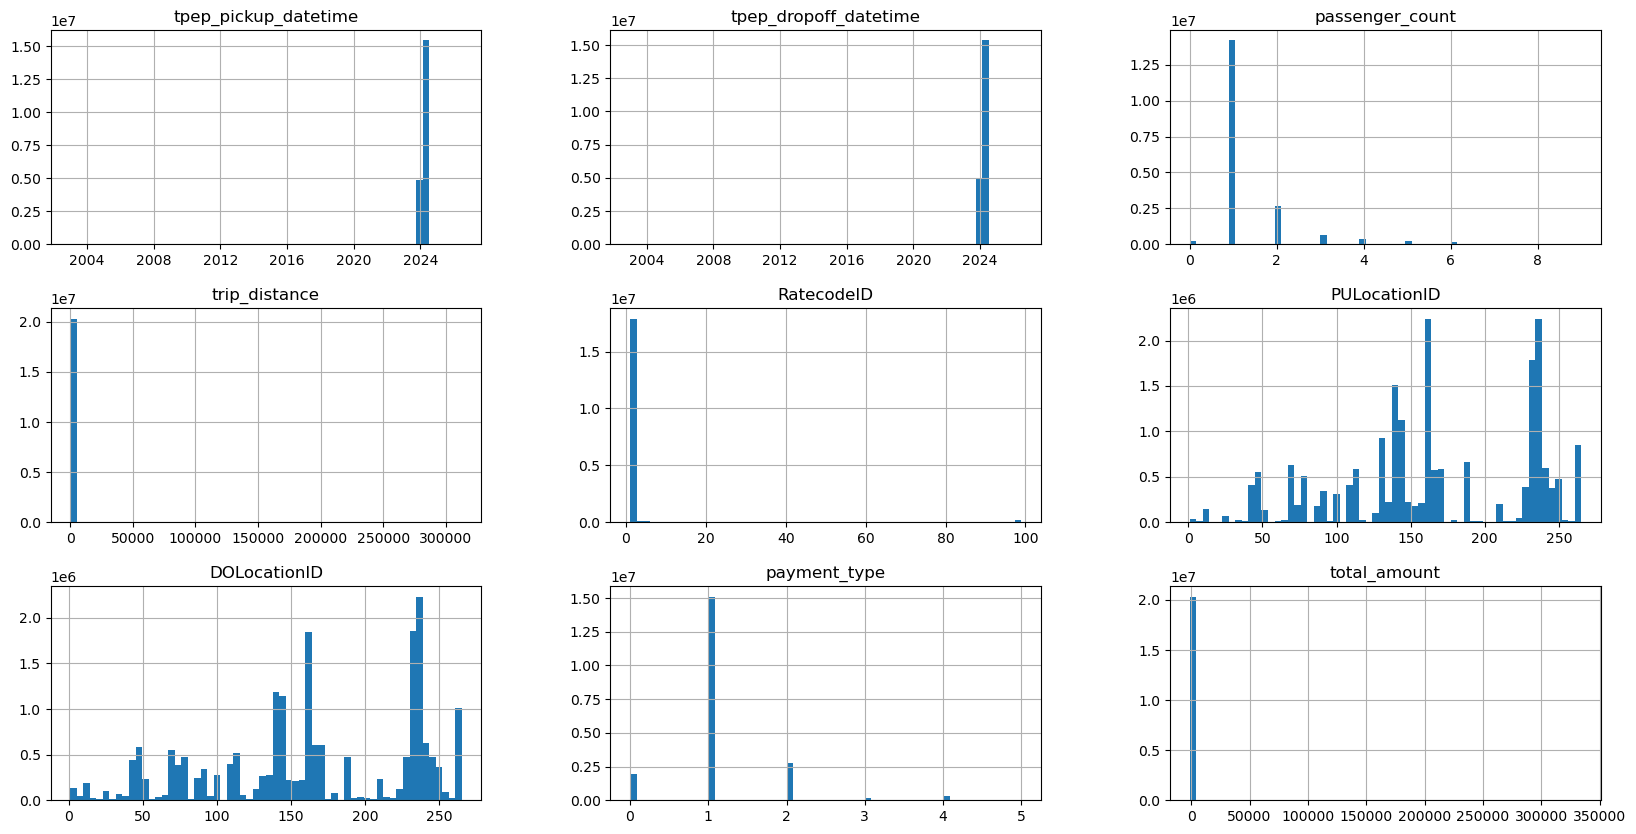

In [12]:
df_taxi.hist(figsize=(20,10), bins=60)

In [13]:
df_taxi['trip_distance'].value_counts()

0.00        364322
0.90        262234
1.00        261668
0.80        256956
1.10        253755
             ...  
79.47            1
52.44            1
82.35            1
61.77            1
60772.68         1
Name: trip_distance, Length: 7056, dtype: int64

In [14]:
df_taxi['total_amount'].value_counts()

 16.80     271181
 12.60     250337
 21.00     229610
 15.12     155403
 15.96     153740
            ...  
 348.79         1
 345.30         1
-71.63          1
 200.89         1
-20.59          1
Name: total_amount, Length: 33401, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

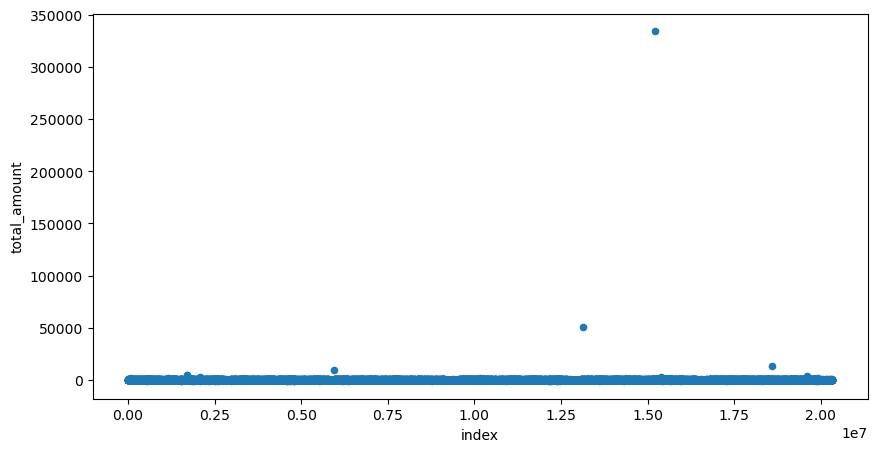

In [47]:
df_taxi.reset_index().plot(kind='scatter', x='index', y='total_amount', figsize=(10,5))

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [9]:
df_taxi_filtered = df_taxi[(df_taxi['total_amount'] > 0) & (df_taxi['total_amount'] < 300)]

In [10]:
print(df_taxi_filtered.shape)
df_taxi.shape

(20068842, 9)


(20332093, 9)

In [34]:
df_taxi_filtered.isna().sum()

tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1975530
trip_distance                  0
RatecodeID               1975530
PULocationID                   0
DOLocationID                   0
payment_type                   0
total_amount                   0
dtype: int64

In [32]:
df_taxi_na = df_taxi_filtered[df_taxi_filtered['passenger_count'].isnull()]
df_taxi_na.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2824462,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,143,141,0,16.72
2824463,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,236,238,0,17.16
2824464,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,142,79,0,25.01
2824465,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,237,4,0,21.79
2824466,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,244,50,0,38.65


In [11]:
df_taxi_filtered['passenger_count'].fillna(1, inplace = True)
df_taxi_filtered['RatecodeID'].fillna(1, inplace = True)

C:\Users\sergp\AppData\Local\Temp\ipykernel_23400\2171171404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_filtered['passenger_count'].fillna(1, inplace = True)
C:\Users\sergp\AppData\Local\Temp\ipykernel_23400\2171171404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_filtered['RatecodeID'].fillna(1, inplace = True)


In [12]:
df_taxi_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [13]:
df_taxi_prep = df_taxi_filtered.copy()

In [46]:
df_taxi_prep.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [14]:
categorical_features = ['RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']
numeric_features = ['passenger_count', 'trip_distance', 'total_amount']

In [15]:
df_taxi_prep[categorical_features] = df_taxi_prep[categorical_features].astype(str)

In [16]:
df_taxi_prep.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [56]:
 df_taxi_prep[numeric_features].describe()

,passenger_count,trip_distance,total_amount
count,2.006884e+07,2.006884e+07,2.006884e+07
mean,1.299790e+00,4.715861e+00,2.805145e+01
std,7.957713e-01,3.615943e+02,2.169469e+01
min,0.000000e+00,0.000000e+00,1.000000e-02
25%,1.000000e+00,1.030000e+00,1.593000e+01
50%,1.000000e+00,1.760000e+00,2.093000e+01
75%,1.000000e+00,3.300000e+00,3.003000e+01
max,9.000000e+00,3.127223e+05,2.999800e+02


In [17]:
df_taxi_prep['transaction_date'] = df_taxi_prep['tpep_pickup_datetime'].dt.date
df_taxi_prep['transaction_year'] = df_taxi_prep['tpep_pickup_datetime'].dt.year
df_taxi_prep['transaction_month'] = df_taxi_prep['tpep_pickup_datetime'].dt.month
df_taxi_prep['transaction_day'] = df_taxi_prep['tpep_pickup_datetime'].dt.day
df_taxi_prep['transaction_hour'] = df_taxi_prep['tpep_pickup_datetime'].dt.hour

In [18]:
df_taxi_prep['trip_duration'] = df_taxi_prep['tpep_dropoff_datetime'] - df_taxi_prep['tpep_pickup_datetime']

In [63]:
df_taxi_prep.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0,19.800000
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0,6.600000
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0,17.916667
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0,8.300000
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0,6.100000


In [19]:
df_taxi_prep['trip_duration'] = df_taxi_prep['trip_duration'] / pd.Timedelta(minutes=1)

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>],
       [<AxesSubplot:title={'center':'trip_duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

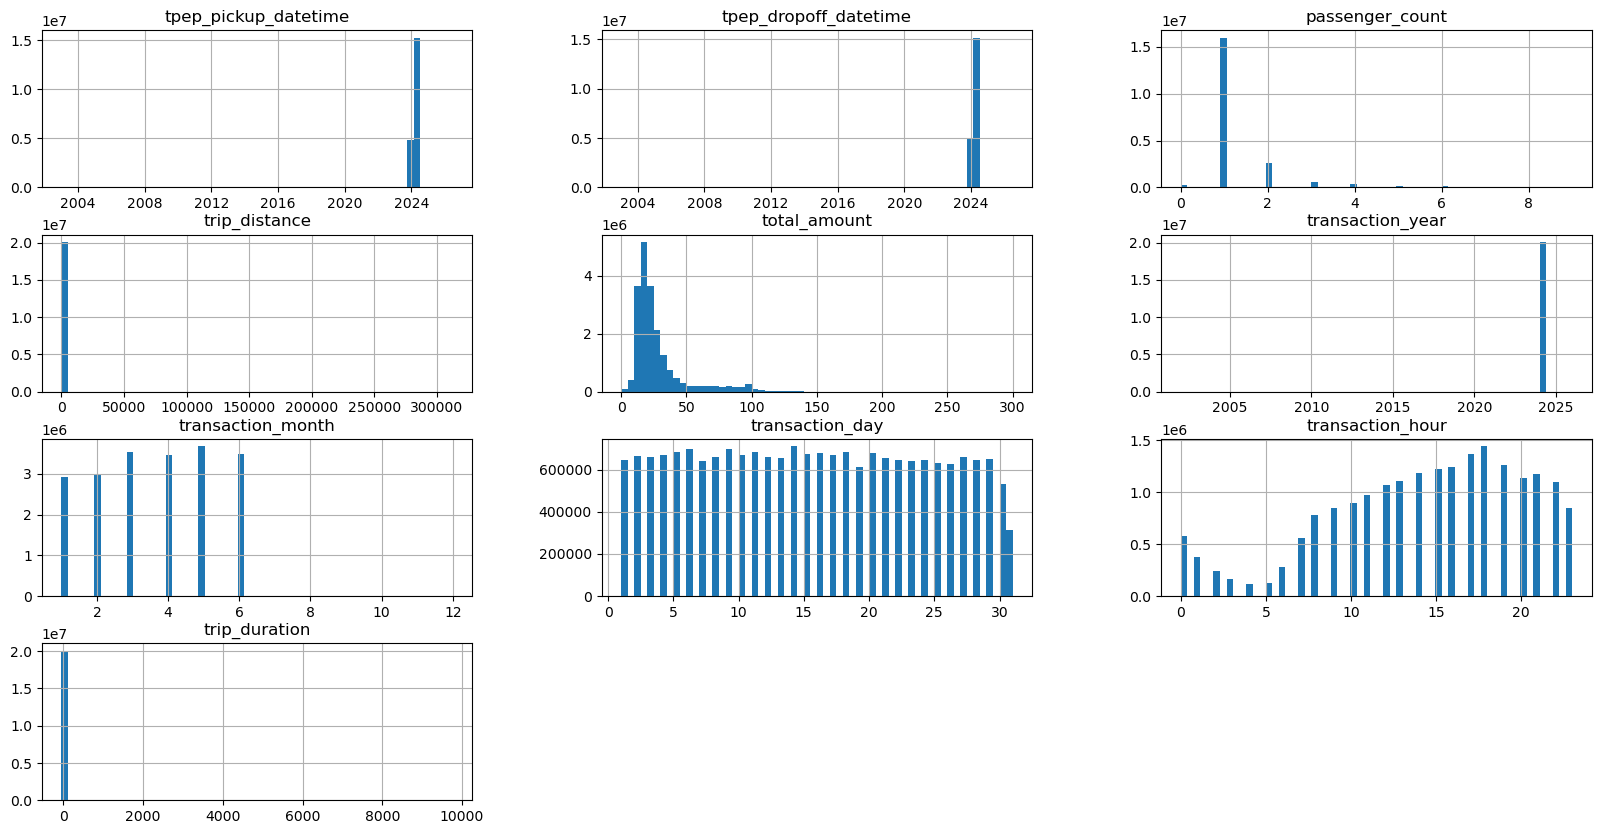

In [64]:
df_taxi_prep.hist(figsize=(20,10), bins=60)

In [65]:
df_mismatch_year = df_taxi_prep[df_taxi_prep['transaction_year']<2024]

In [ ]:
del df_mismatch_year
gc.collect()

In [21]:
df_outlier_distance = df_taxi_prep[df_taxi_prep['trip_distance']>100]

In [22]:
df_outlier_distance.shape

(541, 15)

In [23]:
df_outlier_distance.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration
80121,2024-01-02 08:13:18,2024-01-02 09:43:30,1.0,971.80,99.0,237,265,1,23.00,2024-01-02,2024,1,2,8,90.200000
80122,2024-01-02 08:40:41,2024-01-02 08:55:27,1.0,964.60,99.0,71,265,1,41.00,2024-01-02,2024,1,2,8,14.766667
166339,2024-01-03 11:02:57,2024-01-03 11:47:35,1.0,10879.28,2.0,132,224,1,98.88,2024-01-03,2024,1,3,11,44.633333
867863,2024-01-11 12:25:11,2024-01-11 12:48:18,1.0,176.43,1.0,138,10,1,52.63,2024-01-11,2024,1,11,12,23.116667
1201773,2024-01-14 17:22:52,2024-01-14 18:05:15,1.0,1715.22,4.0,132,162,1,98.88,2024-01-14,2024,1,14,17,42.383333


In [26]:
del df_outlier_distance
gc.collect()

22

In [25]:
df_taxi_prep[df_taxi_prep['trip_duration']>180].shape

(12705, 15)

In [20]:
df_taxi_prep = df_taxi_prep[df_taxi_prep['transaction_year']==2024]

In [36]:
df_taxi_prep = df_taxi_prep[(df_taxi_prep['trip_distance']<=40) & (df_taxi_prep['trip_distance']>0)]

In [37]:
df_taxi_prep = df_taxi_prep[(df_taxi_prep['trip_duration']<=100) & (df_taxi_prep['trip_duration']>0)]

In [38]:
df_taxi_prep.shape

(19692141, 15)

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>],
       [<AxesSubplot:title={'center':'trip_duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

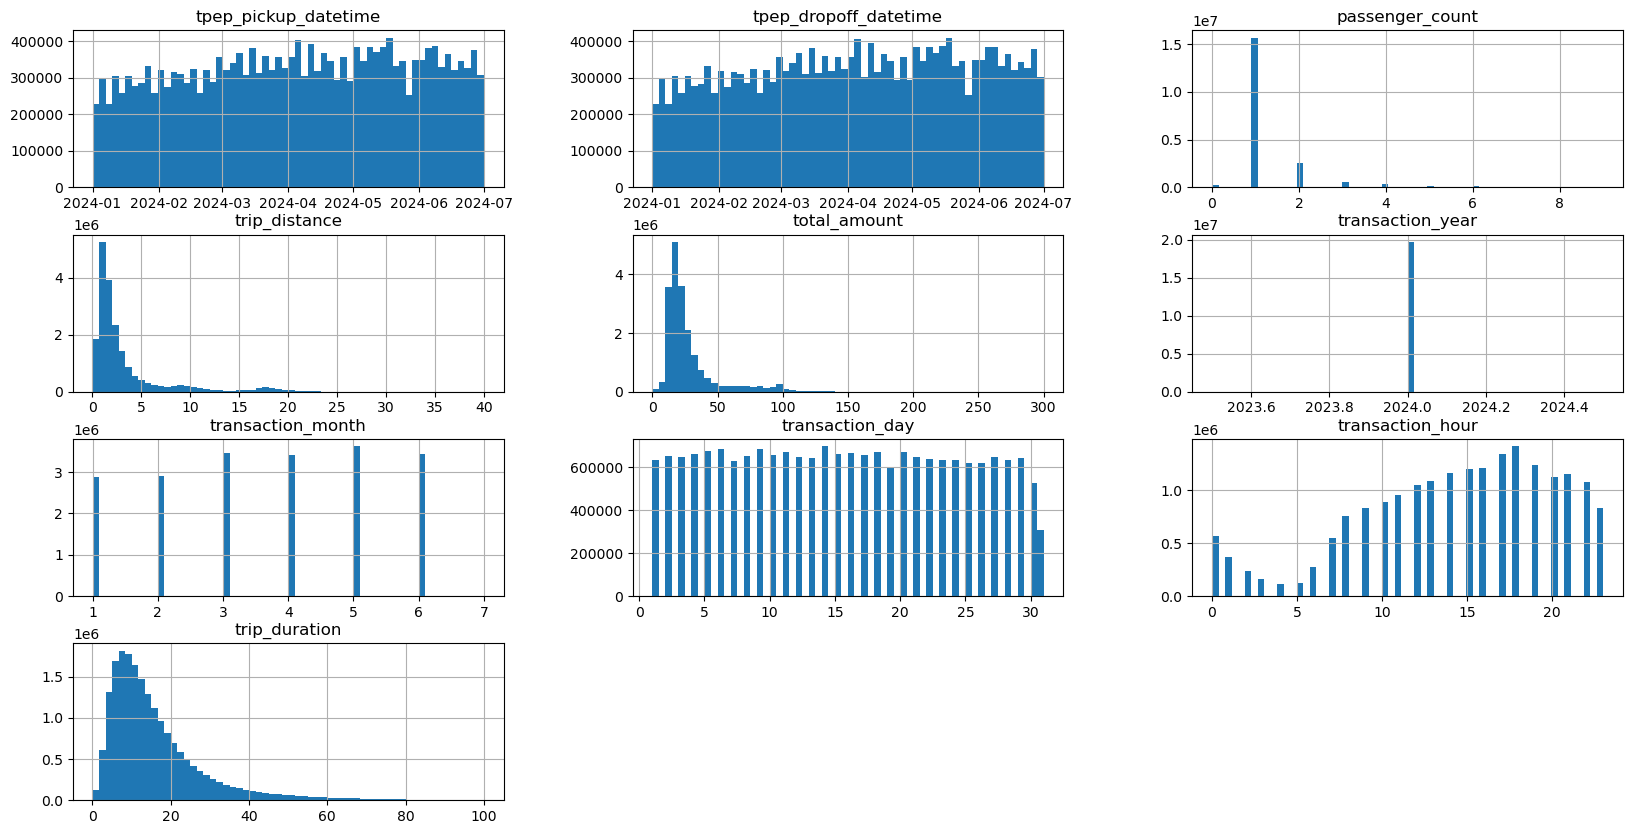

In [40]:
df_taxi_prep.hist(figsize=(20,10), bins=60)

In [41]:
selected_cat_features = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour' ]
selected_num_features = ['trip_distance', 'total_amount', 'trip_duration']
selected_features = selected_cat_features + selected_num_features

In [42]:
df_taxi_main = df_taxi_prep[selected_features] 
print(df_taxi_main.shape)
df_taxi_main.head()

(19692141, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,trip_duration
0,186,2024-01-01,1,1,0,1.72,22.70,19.800000
1,140,2024-01-01,1,1,0,1.80,18.75,6.600000
2,236,2024-01-01,1,1,0,4.70,31.30,17.916667
3,79,2024-01-01,1,1,0,1.40,17.00,8.300000
4,211,2024-01-01,1,1,0,0.80,16.10,6.100000


In [45]:
df_taxi_grouped_by_location =  df_taxi_main.groupby(selected_cat_features).mean().reset_index()
df_taxi_grouped_by_location['transactions_qty'] = df_taxi_main.groupby(selected_cat_features).count().reset_index()['trip_distance']
print(df_taxi_grouped_by_location.shape)
df_taxi_grouped_by_location.head()

(488366, 9)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,trip_duration,transactions_qty
0,1,2024-01-01,1,1,6,0.06,108.000,0.116667,1
1,1,2024-01-01,1,1,14,0.01,21.000,0.850000,1
2,1,2024-01-01,1,1,16,17.00,142.800,0.283333,1
3,1,2024-01-01,1,1,17,0.03,101.375,2.316667,2
4,1,2024-01-02,1,2,18,2.00,10.000,1.216667,1


<AxesSubplot:>

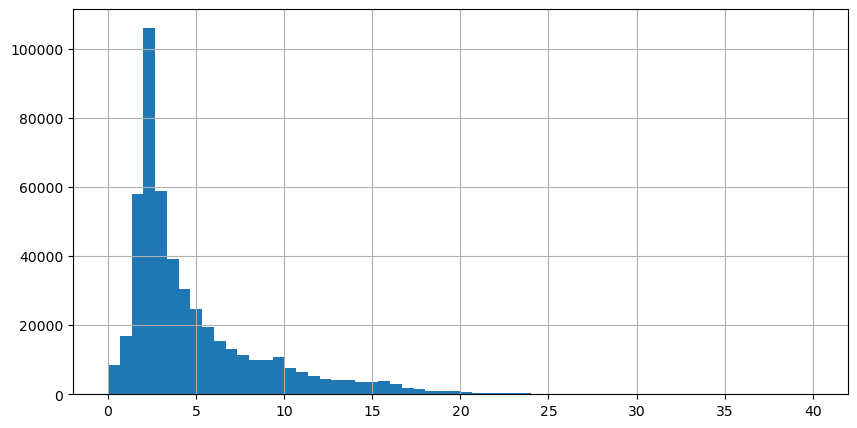

In [46]:
df_taxi_grouped_by_location['trip_distance'].hist(figsize=(10,5), bins=60)

<AxesSubplot:>

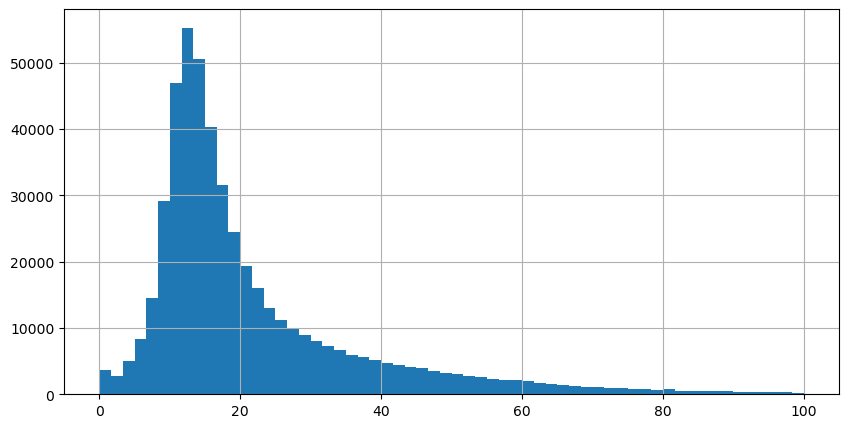

In [47]:
df_taxi_grouped_by_location['trip_duration'].hist(figsize=(10,5), bins=60)

<AxesSubplot:>

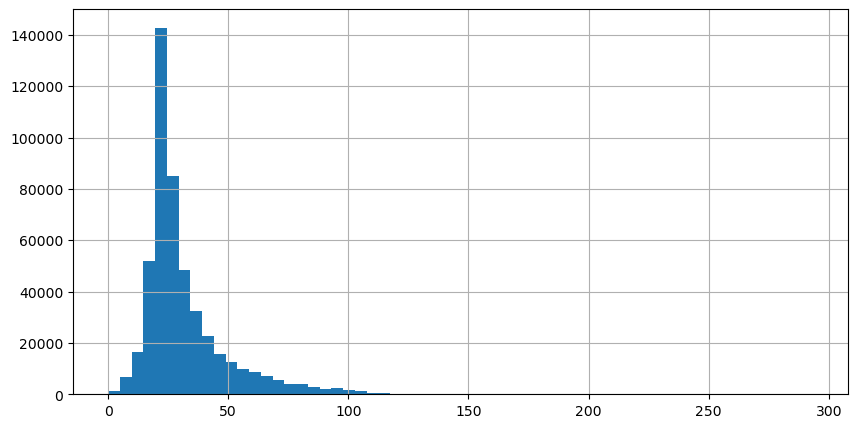

In [48]:
df_taxi_grouped_by_location['total_amount'].hist(figsize=(10,5), bins=60)

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [49]:
df_for_benchmark_model = df_taxi_grouped_by_location.copy()

In [50]:
cat_features_bench = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
num_features_bench = ['trip_distance', 'trip_duration']
all_features_bench = cat_features_bench + num_features_bench
target_bench = 'total_amount'

In [55]:
df_for_benchmark_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488366 entries, 0 to 488365
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PULocationID       488366 non-null  object 
 1   transaction_date   488366 non-null  object 
 2   transaction_month  488366 non-null  int64  
 3   transaction_day    488366 non-null  int64  
 4   transaction_hour   488366 non-null  int64  
 5   trip_distance      488366 non-null  float64
 6   total_amount       488366 non-null  float64
 7   trip_duration      488366 non-null  float64
 8   transactions_qty   488366 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 33.5+ MB


## 5.1 Train-test split

In [52]:
X_bench = df_for_benchmark_model[all_features_bench]
y_bench = df_for_benchmark_model[target_bench]

In [53]:
X_bench = pd.get_dummies(X_bench)

In [60]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=844)

## 5.2 Fit a model to the data

In [61]:
bench_model = DecisionTreeRegressor(max_depth=10)
bench_model.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## 5.3 Model Evaluation

In [64]:
y_pred_b = bench_model.predict(X_test_b)

print("mean_absolute_error:", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error:", mean_squared_error(y_test_b, y_pred_b))
print("r2_score:", r2_score(y_test_b, y_pred_b))

mean_absolute_error: 5.396746363759143
mean_squared_error: 117.36038057048435
r2_score: 0.6575945372577283


<AxesSubplot:xlabel='true', ylabel='predicted'>

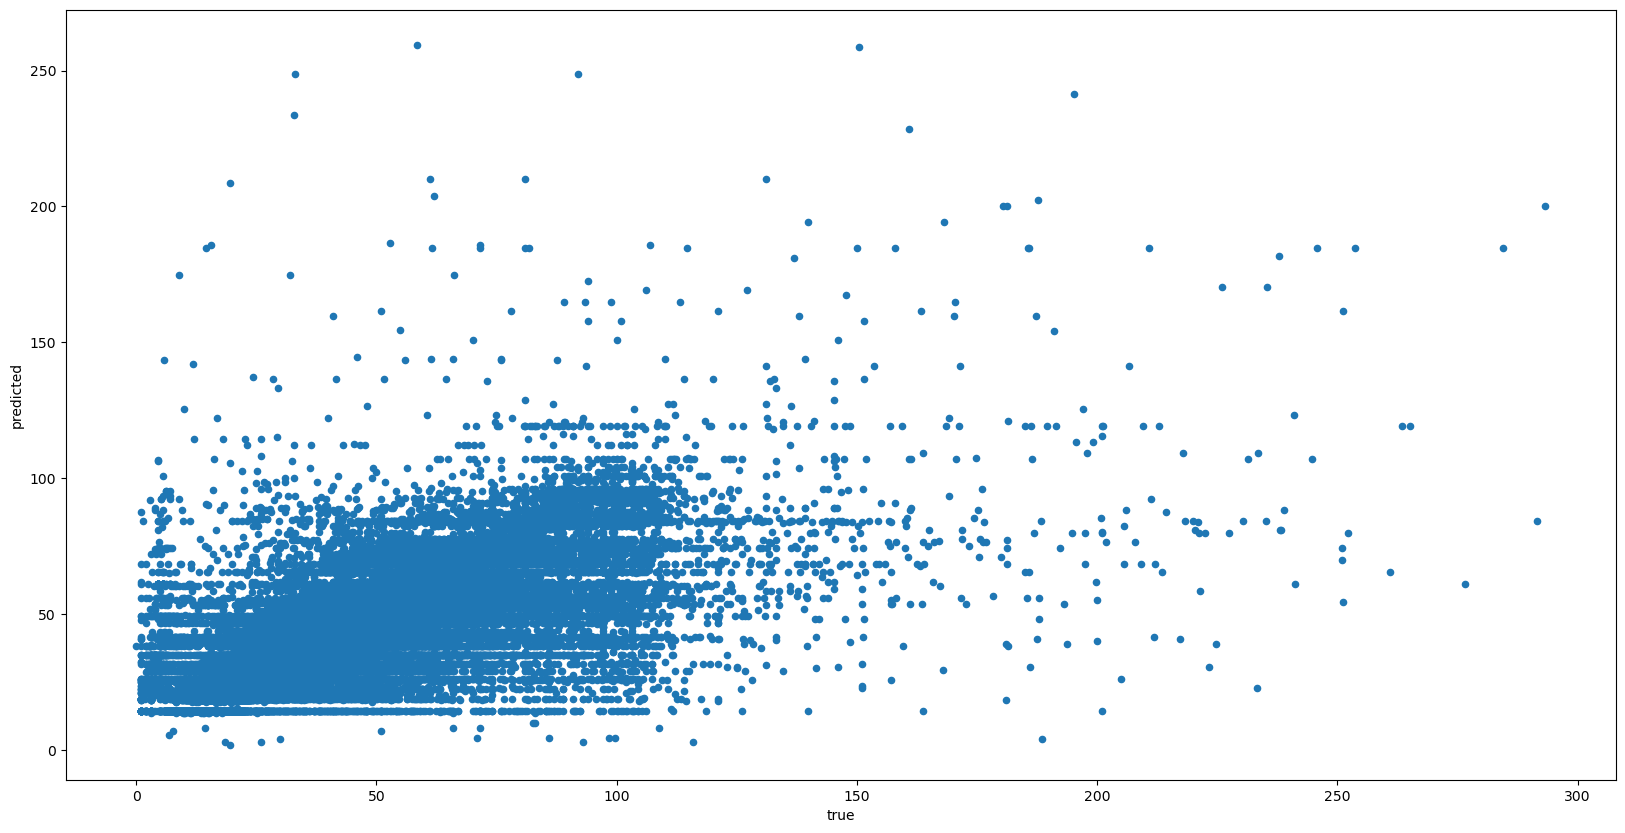

In [68]:
plot_data = {'true':y_test_b, 'predicted':y_pred_b}
results = pd.DataFrame(plot_data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='predicted')

## 5.4 Fix problems

The results are too good to be true. Here we got a data leakage - 'trip_distance' and 'trip_duration' are highly correlated with the target variable 'total_price' so to be more accurate we must exclude them. These parameters are also unknown at the stage of picking the order by a taxi driver so in a production application we can not use them for the prediction of the amount of money a taxi driver will earn.

In [69]:
all_features_bench = cat_features_bench
target_bench = 'total_amount'

X_bench = df_for_benchmark_model[all_features_bench]
y_bench = df_for_benchmark_model[target_bench]

X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=844)

bench_model = DecisionTreeRegressor(max_depth=10)
bench_model.fit(X_train_b, y_train_b)

y_pred_b = bench_model.predict(X_test_b)

print("mean_absolute_error:", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error:", mean_squared_error(y_test_b, y_pred_b))
print("r2_score:", r2_score(y_test_b, y_pred_b))

mean_absolute_error: 10.778444238738425
mean_squared_error: 264.1690934682724
r2_score: 0.22927192080051273


<AxesSubplot:xlabel='true', ylabel='predicted'>

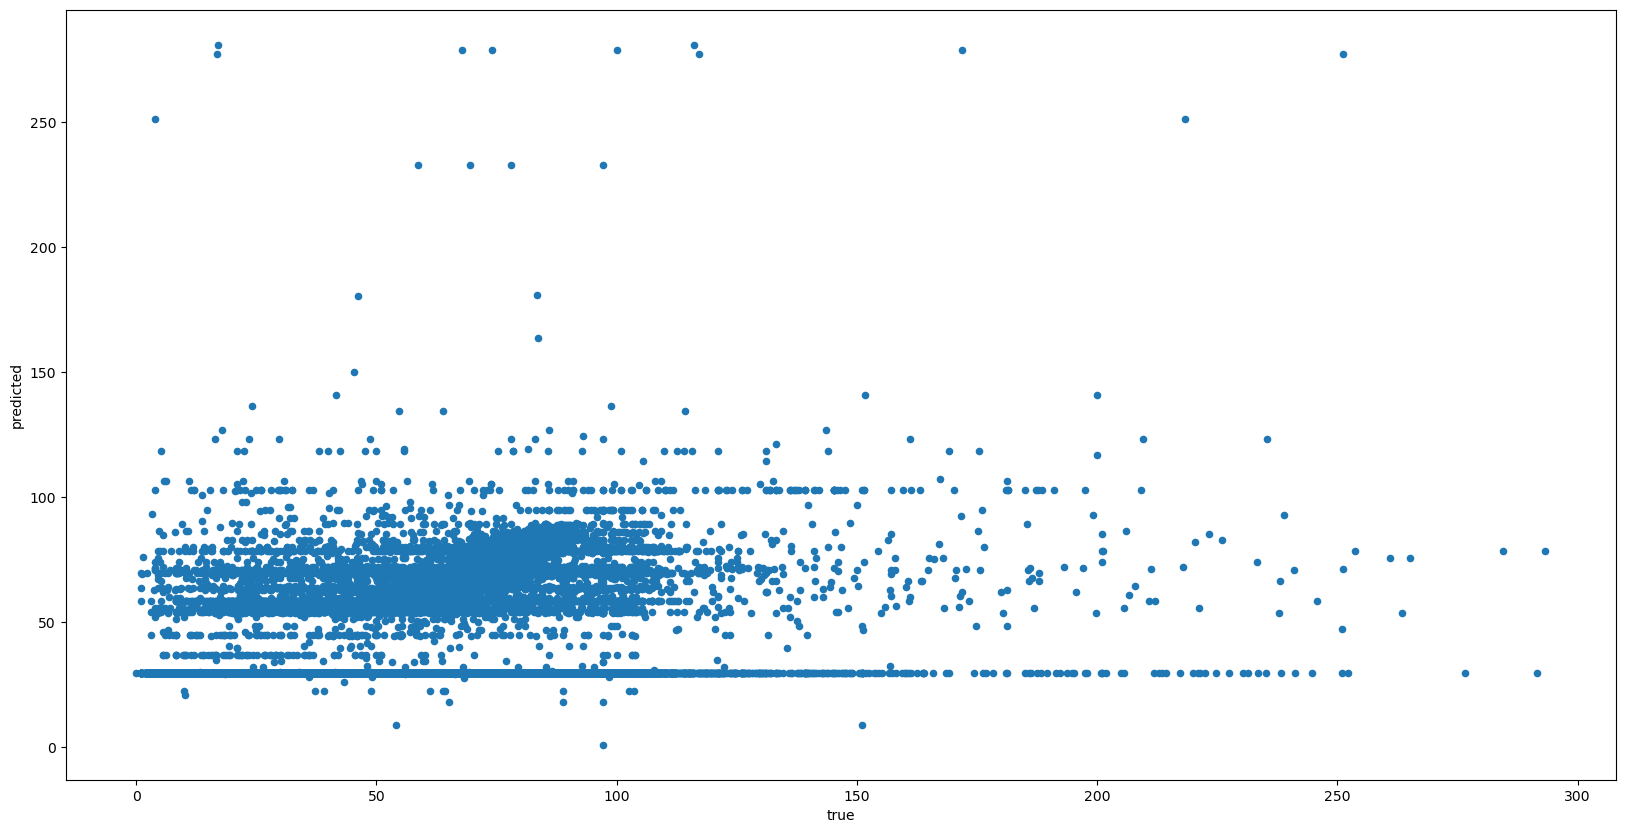

In [70]:
plot_data = {'true':y_test_b, 'predicted':y_pred_b}
results = pd.DataFrame(plot_data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='predicted')

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [ ]:
df_new_features = 

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)